## EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nba_data = pd.read_csv('NBA Stats 202324 All Stats.csv')
nba_data.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,Joel Embiid,Phi,C,30.2,6,41.4,35.7,15.8,78,...,5.7,1.2,1.5,4.2,43.8,38.7,49.5,12.2,117.1,108.0
1,2,Jalen Brunson,Nyk,G,27.8,13,39.8,36.4,9.3,120,...,7.5,0.8,0.2,2.7,35.7,39.8,43.2,9.3,114.8,114.7
2,3,Damian Lillard,Mil,G,33.9,4,39.1,31.4,10.0,38,...,5.0,1.0,0.0,2.3,34.5,36.3,39.5,8.2,127.6,115.7
3,4,Shai Gilgeous-Alexander,Okc,G,25.9,10,39.9,32.3,8.9,81,...,6.4,1.3,1.7,2.2,37.4,36.6,43.8,11.2,118.3,106.9
4,5,Tyrese Maxey,Phi,G,23.6,6,44.6,28.1,8.6,28,...,6.8,0.8,0.3,2.2,35.0,36.7,41.8,9.1,120.9,113.3


## 1. Univariate analysis

1. Histograms with KDE (Kernel Density Estimation) for Distribution:

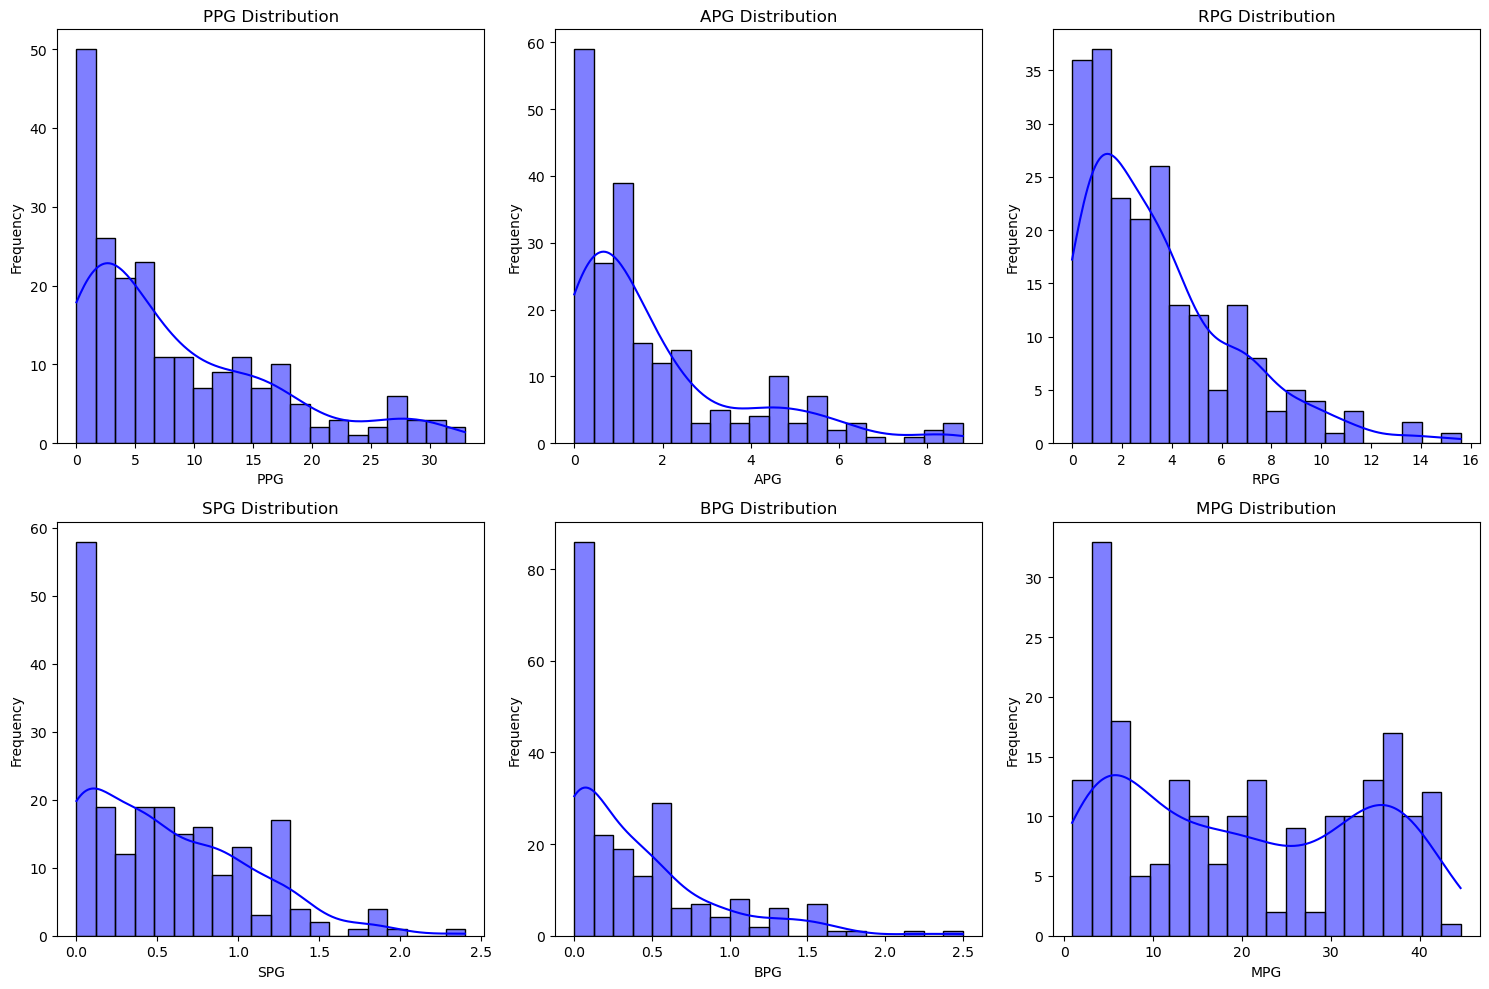

In [5]:
# Select key performance metrics for univariate analysis
metrics = ['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'MPG']

# Set up the plot size for better clarity
plt.figure(figsize=(15, 10))

# Create histograms for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.histplot(nba_data[metric], kde=True, color='blue', bins=20)
    plt.title(f'{metric} Distribution')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**PPG (Points per Game)** has a right-skewed distribution with some players scoring very high points.

**APG (Assists per Game) and RPG (Rebounds per Game)** have distributions that seem more normally distributed, with most players clustering around moderate values.

**SPG (Steals per Game) and BPG (Blocks per Game)** are right-skewed, as expected, since most players have fewer steals and blocks.

2. Box Plot for Outlier Detection:

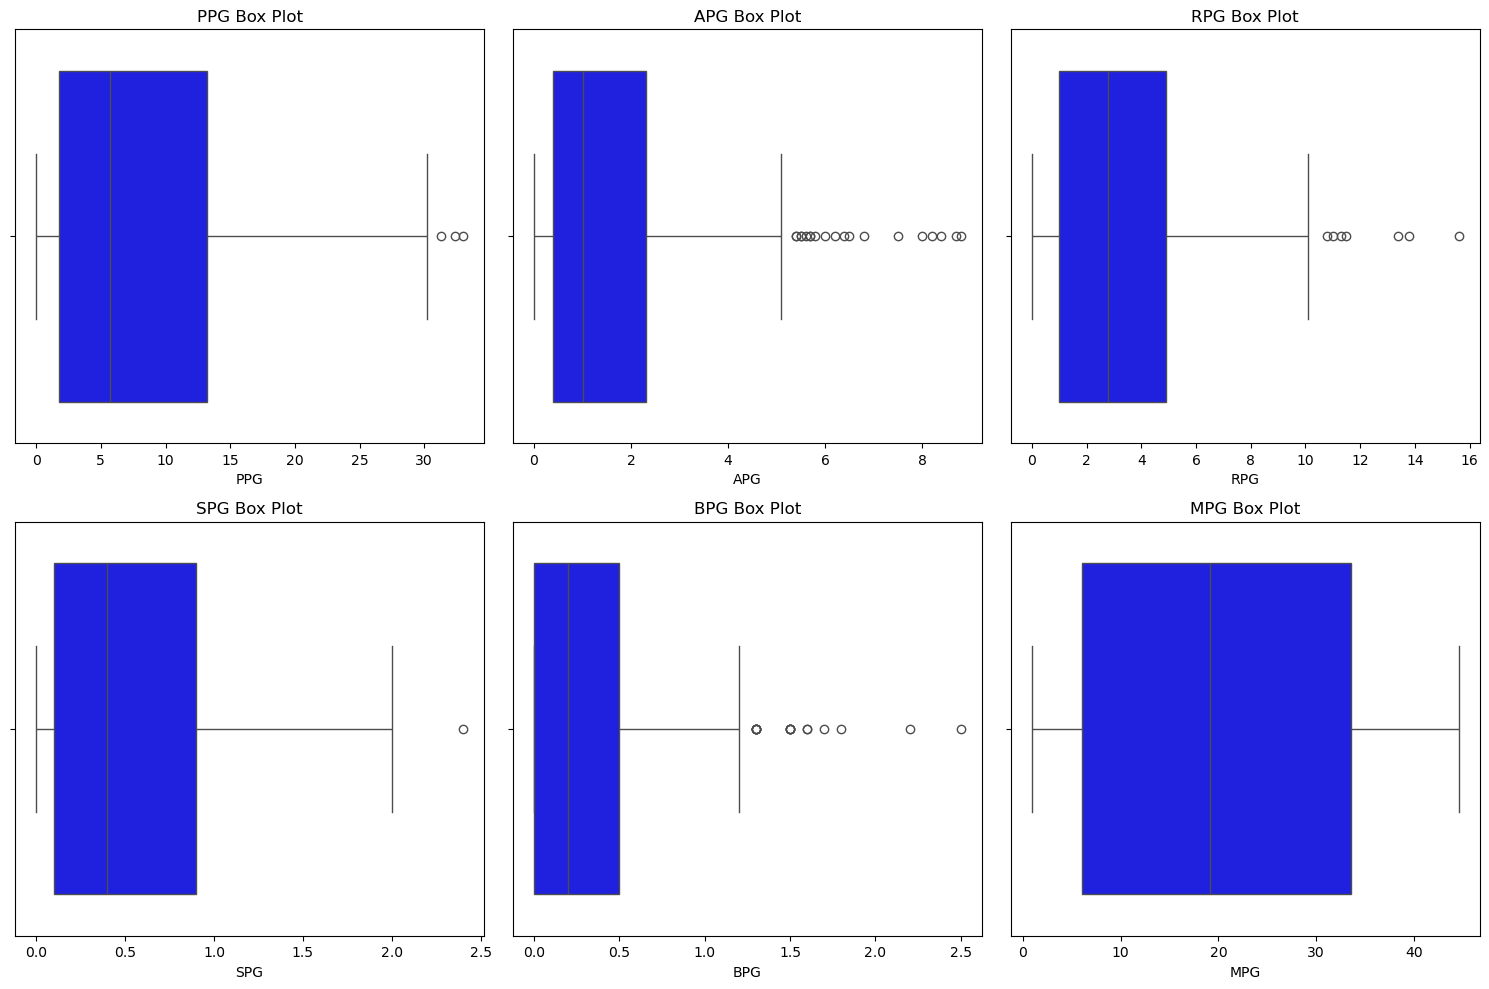

In [10]:
# Set up the plot size for better clarity
plt.figure(figsize=(15, 10))

# Create box plots for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=nba_data[metric], color='blue')
    plt.title(f'{metric} Box Plot')
    plt.xlabel(metric)

plt.tight_layout()
plt.show()

3. Summary Statistics for Descriptive Insights:

In [12]:
# Display summary statistics for the selected metrics
summary_stats = nba_data[metrics].describe()
print(summary_stats)

              PPG         APG         RPG         SPG         BPG         MPG
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000
mean     8.485446    1.818310    3.468075    0.542254    0.387793   19.994366
std      8.286254    2.005416    2.999012    0.498676    0.468278   13.518864
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.900000
25%      1.800000    0.400000    1.000000    0.100000    0.000000    6.000000
50%      5.700000    1.000000    2.800000    0.400000    0.200000   19.100000
75%     13.200000    2.300000    4.900000    0.900000    0.500000   33.600000
max     33.000000    8.800000   15.600000    2.400000    2.500000   44.600000


**PPG (Points per Game):**

• Mean: 8.49

• Standard deviation: 8.29

• Minimum: 0

• Maximum: 33 (which might represent outliers)

**APG (Assists per Game):**

• Mean: 1.82

• Standard deviation: 2.01

• Minimum: 0

• Maximum: 8.8

**RPG (Rebounds per Game):**

• Mean: 3.47

• Standard deviation: 3.00

• Minimum: 0

• Maximum: 15.6

**SPG (Steals per Game), BPG (Blocks per Game), and MPG (Minutes per Game)** follow similar distributions.

## 2. Bivariate analysis

1. Correlation Matrix:
  
• help  understand  linear relationships between numerical variables (e.g., PPG, APG, RPG).

In [27]:
# Calculate the correlation matrix
corr_matrix = nba_data[metrics].corr()

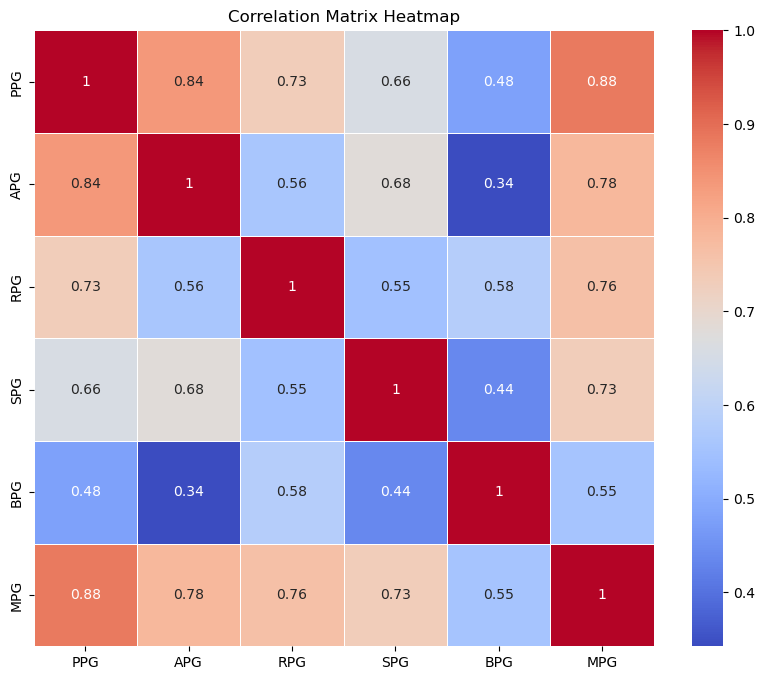

In [32]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

### <span style="color:red">  Results:</span> 

(visually shows relationship between various numerical metrics in your dataset)

**Key Points:**

a. Values on the diagonal: These <span style="color:red">  **values are all 1 because any variable is perfectly correlated with itself.**</span>

b. Color Gradient: The color gradient ranges from blue (representing negative correlation) to red (representing positive correlation). The deeper the red, the stronger the positive correlation, and the deeper the blue, the stronger the negative correlation.

c. Numbers inside the squares: These numbers represent the Pearson correlation coefficient, which ranges from -1 to 1:

• 1 indicates a perfect positive linear relationship.

• -1 indicates a perfect negative linear relationship.

• 0 indicates no linear relationship.

**Key Observations:**

a. **PPG vs. APG (0.84):**

<u> Strong Positive Correlation<u>: 

There is a **strong positive correlation between Points per Game (PPG) and Assists per Game (APG)**,

= <span style="color:red; font-size: larger;">  players who score more points tend to have more assists.</span> 

b. **PPG vs. MPG (0.88):**

<u> Very Strong Positive Correlation<u> : 

The **number of minutes played per game (MPG) strongly correlates with PPG.** 

= <span style="color:red; font-size: larger;"> players who play more minutes are likely to score more points.</span> 

c. **APG vs. MPG (0.78):**

<u> Strong Positive Correlation<u> : 

**APG correlates strongly with MPG** 

=  <span style="color:red; font-size: larger;">more minutes on the court often leads to more assists.</span>

d. **RPG vs. PPG (0.73):**

<u> Moderate Positive Correlation<u> : 

**Players with more rebounds also tend to score more points** (but correlation is moderate)

= <span style="color:red; font-size: larger;">  the relationship is not as strong as with minutes played.</span>

e. **SPG (Steals per Game):**

<u> Weaker correlations:<u>  

**Steals (SPG) show weaker correlations with other stats** - like PPG (0.66), APG (0.68), and RPG (0.55), 

= <span style="color:red; font-size: larger;"> steals are somewhat independent of points, assists, and rebounds.</span>

f. **BPG (Blocks per Game):**

<u> Moderate correlation<u> : 

**Blocks have a moderate correlation with RPG (0.58) and PPG (0.48)** - but the correlations are weaker compared to other variables. 

= <span style="color:red; font-size: larger;">  blocks are less strongly linked to scoring and rebounding compared to other metrics (like minutes played.) </span>

g. **RPG vs. MPG (0.76):**

<u> Strong Positive Correlation<u> :

**Strong relationship between Rebounds per Game (RPG) and Minutes per Game (MPG).** 

= <span style="color:red; font-size: larger;">  Players who play more minutes tend to get more rebounds.</span>

2. Scatter Plots:

•  visualize relationship between specific pairs of variables (e.g., PPG vs. RPG or APG vs. MPG).

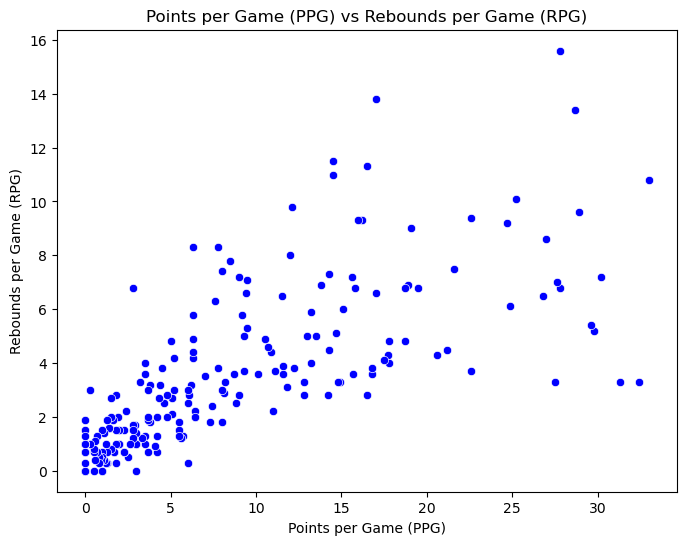

In [36]:
# Scatter plot for Points per Game vs Rebounds per Game
plt.figure(figsize=(8, 6))
sns.scatterplot(x=nba_data['PPG'], y=nba_data['RPG'], color='blue')
plt.title('Points per Game (PPG) vs Rebounds per Game (RPG)')
plt.xlabel('Points per Game (PPG)')
plt.ylabel('Rebounds per Game (RPG)')
plt.show()

### <span style="color:red">  Results:</span> 

(shows  relationship between Points per Game (PPG) and Rebounds per Game (RPG) for each player)

• Each blue dot represents a player. The position of the dot corresponds to that player's PPG and RPG.

**Key Observations:**

a. **Positive Correlation:**

<u>Positive correlation between PPG and RPG<u>

= <span style="color:red; font-size: larger;">  As points per game increase, rebounds per game also tend to increase</span> (as shown by upward trend)

b. **Cluster of Players:**

<u>Most players clustered in lower left part of the plot<u>, 

= <span style="color:red; font-size: larger;">  score fewer points and grab fewer rebounds.</span>

• could be due to players with less playtime or those playing in specific team roles (e.g., bench players or role players).

c. **Higher Performers:**

<u>As move to the right on the X-axis (higher PPG) → some players higher RPG values (above 8).<u> 

= <span style="color:red; font-size: larger;">  high-scorers also tend to get a good number of rebounds</span> 

• although the correlation is not perfect (i.e., there are some high scorers with relatively low rebounds).

d. **Outliers:**

= <span style="color:red; font-size: larger;">  few outliers where players have unusually high PPG and low RPG</span>  (or vice versa)

• especially players who are primarily scorers or specialize in other aspects (e.g., shooters or point guards).

### <span style="color:red">  Conclusion:</span>
The plot suggests **players who score more points generally tend to have more rebounds** (but relationship is not perfectly linear)

(***Note: the scatter plot also shows a lot of variance, with several players who don't follow this pattern.***)

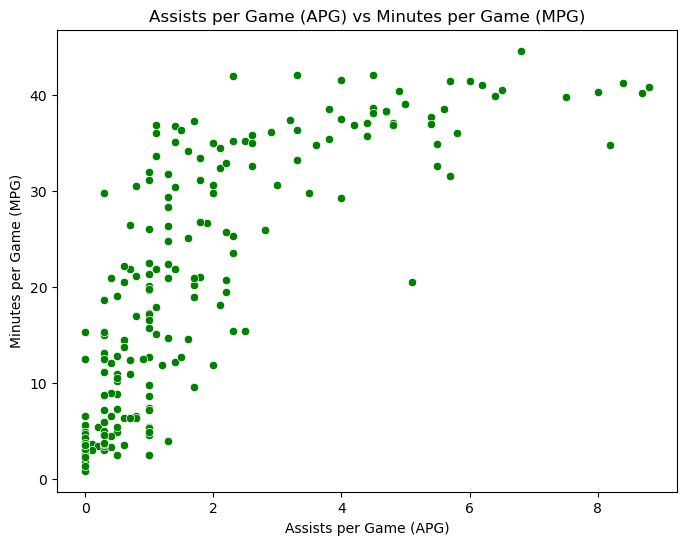

In [39]:
# Scatter plot for Assists per Game vs Minutes per Game
plt.figure(figsize=(8, 6))
sns.scatterplot(x=nba_data['APG'], y=nba_data['MPG'], color='green')
plt.title('Assists per Game (APG) vs Minutes per Game (MPG)')
plt.xlabel('Assists per Game (APG)')
plt.ylabel('Minutes per Game (MPG)')
plt.show()

### <span style="color:red">  Results:</span> 

(shows relationship between Assists per Game (APG) and Minutes per Game (MPG) for each player)

• Each green dot represents a player. The position of the dot corresponds to that player's APG and MPG.

**Key Observations:**

a. **Positive Correlation:**

<u> strong correlation between APG and MPG <u>

As a player's minutes per game increase, so does their average assists per game. 

= <span style="color:red; font-size: larger;"> Players who are on the court more tend to record more assists.</span>

b. **Cluster of Players:**

<u> Most players clustered in the lower left part of the plot<u> → with relatively low APG and MPG

= <span style="color:red; font-size: larger;"> players likely have less playtime or are in roles that don't emphasize playmaking </span> (e.g., bench players or role players).

c. **Higher Performers:**

<u> As move to  right on the X-axis (higher APG)<u> → you see a strong upward trend in MPG. 

= <span style="color:red; font-size: larger;"> players who have higher assists also tend to play more minutes.</span>

d. **Outliers:**

= <span style="color:red; font-size: larger;"> Some outliers near the top of the plot, where players are averaging high assists (5-8 APG) but have a wide range of MPG (from around 20 to 40 minutes). </span>

• likely star players who are both on the court for a significant amount of time and have high involvement in playmaking.

### <span style="color:red">  Conclusion:</span>
This scatter plot suggests **minutes played strongly impacts assists.**

• Players who are on the court for longer periods have more opportunities to accumulate assists

3. Pair Plot: 

• visualizes  relationships between all pairs of variables in a dataset (of performance metrics for the players), allowing  to quickly see any linear or non-linear correlations.

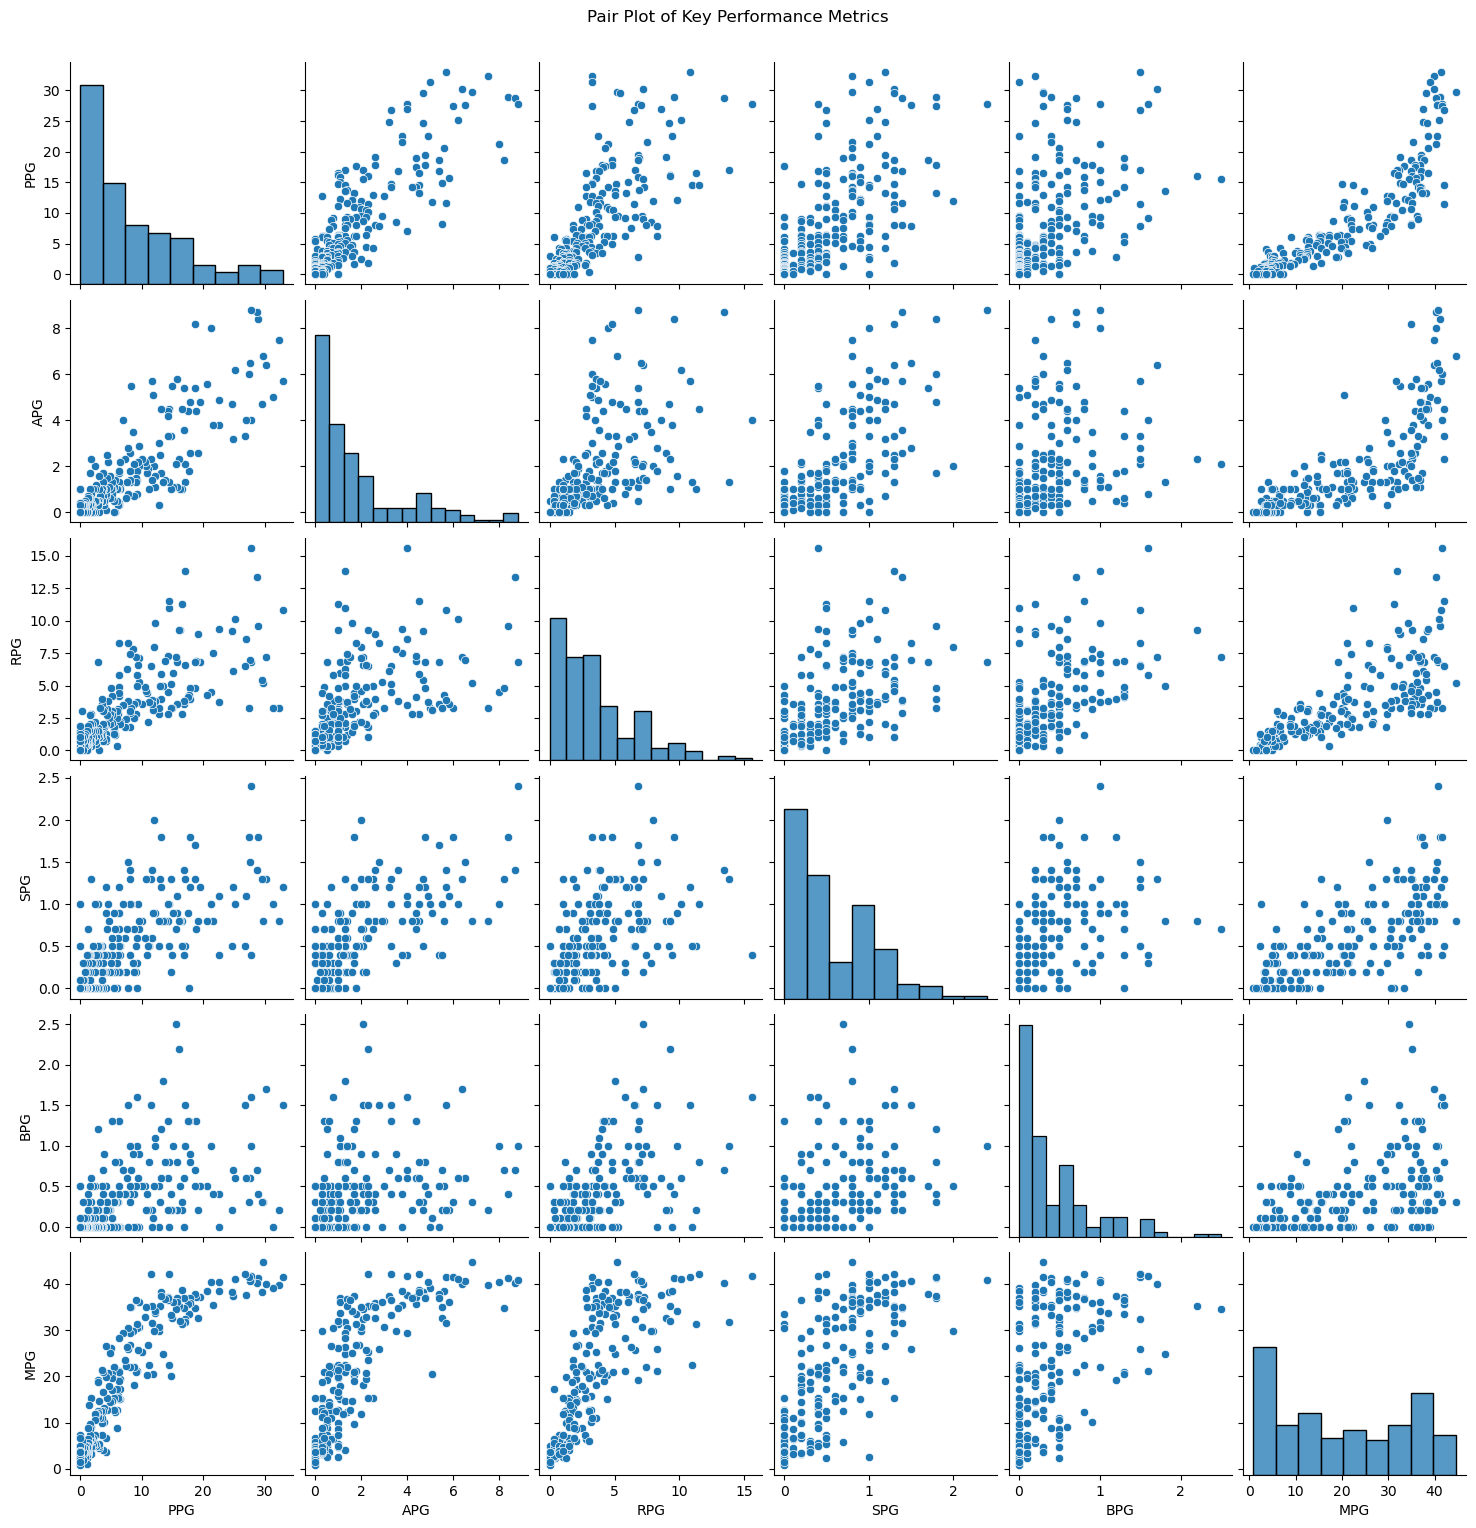

In [103]:
# Create a pair plot for multiple variables
sns.pairplot(nba_data[metrics])
plt.suptitle('Pair Plot of Key Performance Metrics', y=1.02)
plt.show()

### <span style="color:red">  Results:</span> 

### 1) **Diagonal Histograms:**

• give a sense of the distribution of each metric (e.g., PPG, APG, RPG, etc.). 

• shape of the histogram tells us about the central tendency (e.g., peak values) and spread (e.g., how widely the values are distributed).

<span style="color:green">  ***For example:***</span>

• **PPG** (Points per Game) has a right-skewed distribution

= <span style="color:red; font-size: larger;">  most players score low points, with a few scoring much higher.</span>

• **RPG** (Rebounds per Game) shows a more normal distribution

= <span style="color:red; font-size: larger;">  a fairly even spread of rebound performances among players.</span>

### 2) **Off-Diagonal Scatter Plots:** show the pairwise relationships between different variables.

<span style="color:green">  ***For example:***</span>

• **PPG vs APG** shows the relationship between points and assists. 

= <span style="color:red; font-size: larger;">  players with more points tend to have more assists as well, indicating a positive correlation</span> (the scatter is clustered in the top-right area).

• **PPG vs MPG** shows a strong positive relationship

= <span style="color:red; font-size: larger;">  players who score more points tend to also play more minutes.</span>

• **SPG** (Steals per Game) and **BPG** (Blocks per Game) show relatively weak correlations with the other metrics. These variables have more dispersed scatter plots, 

= <span style="color:red; font-size: larger;">  these statistics are less influenced by factors like scoring or minutes played.</span>

### 3) **Interpretation of Specific Relationships:**

• **PPG and MPG**: 

= <span style="color:red; font-size: larger;">  Players who score more points tend to play more minutes.</span>

• **APG and RPG**: weak positive correlation between assists and rebounds (but not as strong as correlation between PPG and MPG)

• **RPG and SPG**:  weak Relationship between rebounds and steals

= <span style="color:red; font-size: larger;">  players who rebound well don’t necessarily have high steal counts </span>

• **MPG and Other Metrics**: Strong relationship between minutes played and other metrics (like PPG, RPG, and APG)

= <span style="color:red; font-size: larger;">  players who have higher minutes played (MPG) have more opportunities to accumulate points, rebounds, and assists.</span>

### <span style="color:red">  Conclusion:</span>

This pair plot provides a comprehensive overview of the relationships between multiple key metrics. 

• shows certain metrics, such as:

= **PPG and MPG →  strongly correlated to scoring metrics**

= **SPG and BPG → weaker in relation to scoring metrics**

## 3. Multivariate analysis